### Requirement Library

In [1]:
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import warnings

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
print(tf.__version__)

2.1.0


### Read Data

In [2]:
base_dir = 'DATASET'

train_dir = os.path.join(base_dir, 'TRAIN')
train_dir_organic = os.path.join(train_dir, 'O')
train_dir_recyclable = os.path.join(train_dir, 'R')

test_dir = os.path.join(base_dir, 'TEST')
test_dir_organic = os.path.join(test_dir, 'O')
test_dir_recyclable = os.path.join(test_dir, 'R')

### Vanilla CNN

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics = ['accuracy'])

In [4]:
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=10,
                                                    class_mode='binary',
                                                    target_size=(100, 100))     


validation_generator =  test_datagen.flow_from_directory(test_dir,
                                                         batch_size=10,
                                                         class_mode  = 'binary',
                                                         target_size = (100, 100))


Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [5]:
history = model.fit(train_generator, 
                   validation_data = validation_generator,
                   epochs=50,
                   verbose=1)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 2257 steps, validate for 252 steps
Epoch 1/50
2257/2257 [==============================] - 73s 32ms/step - loss: 0.4663 - accuracy: 0.8027 - val_loss: 0.3951 - val_accuracy: 0.8611
Epoch 2/50
2257/2257 [==============================] - 72s 32ms/step - loss: 0.4143 - accuracy: 0.8293 - val_loss: 0.3507 - val_accuracy: 0.8838
Epoch 3/50
2257/2257 [==============================] - 73s 32ms/step - loss: 0.3881 - accuracy: 0.8414 - val_loss: 0.3199 - val_accuracy: 0.8854
Epoch 4/50
2257/2257 [==============================] - 74s 33ms/step - loss: 0.3668 - accuracy: 0.8520 - val_loss: 0.3231 - val_accuracy: 0.8822
Epoch 5/50
2257/2257 [==============================] - 73s 32ms/step - loss: 0.3465 - accuracy: 0.8612 - val_loss: 0.3780 - val_accuracy: 0.8595
Epoch 6/50
2257/2257 [==============================] - 75s 33ms/step - loss: 0.3277 - accuracy: 0.8716 - val_loss: 0.3777 - val_accuracy: 0.8715
Epoch 7/50
2257/2257 [=======

### Learning Curve

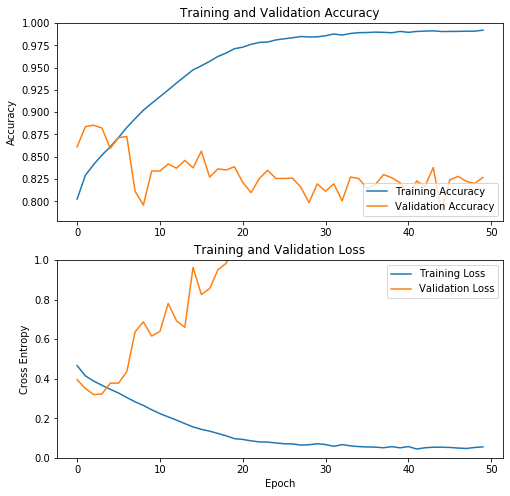

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.show()

### Save History

In [7]:
import pickle

pickle_out = open("Trained_vanilla_cnn.pickle","wb")
pickle.dump(history.history, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("Trained_vanilla_cnn.pickle","rb")
saved_history = pickle.load(pickle_in)
print(len(saved_history))